# Messtechnik HS2021 - Tutorial 4

## Aufgabe 1: Fourier Transform der Dirac-delta Funktion
---------
In der folgenden Aufgabe generieren Sie selber eine Dirac-delta Funktion und berechnen die Fourier Transformation dieser Funktion um das entsprechende Spektrum zu erhalten.

Die Dirac-delta Funktion ist mathematisch definiert als:
$$\delta(t) = 0 \;\; \text{if} \;\; t \neq 0$$
$$ \int_{-\infty}^{\infty} \delta(t) dt = 1$$

---------

### 1a)
Mit dem Package [Sympy](https://www.sympy.org/en/index.html) können Sie mathematische Probleme analytisch lösen. Hier möchten wir Ihnen demonstrieren, wie man die Fourier Transformation einer Dirac-delta Funktion analytisch lösen kann mit Python.

In [1]:
import sympy as sp 

t = sp.Symbol('t')
omega = sp.Symbol('omega')

dirac    = sp.simplify(sp.DiracDelta(t))
spc      = sp.fourier_transform(dirac,t,omega)
print([dirac,spc])

[DiracDelta(t), 1]


### 1b)
Schreiben Sie eine Funktion, die als Input die Zeitachse nimmt und eine Dirac-delta Funktion bei $t = 0$ rausgibt. 

In [2]:
import numpy as np

def Dirac_delta(t):

    if len(t)%2 == 1:
        dirac      = np.zeros_like(t)
        dirac[t == 0] = 1
    elif len(t)%2 == 0:
        if np.abs(t[0]) == np.abs(t[len(t)-1]):
            t          = np.linspace(np.amin(t),np.amax(t),len(t)+1)
            dirac      = np.zeros_like(t)
            dirac[t == 0] = 1
        else:
            raise IndexError('Die Funktion kann mit der definierte Zeitachse keine Dirac-delta Funktion generieren')

    return t,dirac

### 1c)
Berechnen Sie zuerst die Dirac-delta Funktion für den Zeitbereich $[-10,10]$ mit einer Auflösung von 2001 Punkten. Generieren Sie danach das dazugehörige Spektrum, indem Sie die Fourier Transformation verwenden. Es gibt bereits Fourier Tranformation Funktionen in [Numpy](https://numpy.org/doc/stable/reference/routines.fft.html). Berechnen Sie die Frequenzachse mit der Numpyfunktion `fftfreq()`. Stellen Sie die Ergebnisse graphisch dar und kommentieren Sie das Resulat in Bezug auf die Erkenntnisse von Aufgabe 1a).

*Hinweis*: Wenden Sie die Funktion `fftshift()` nach Berechnung der Frequenzachse und des Spektrum auf beide Vektoren an, sodass die Nullfrequenz in der Mitte der Spektrums ist.

Text(0.5, 1.0, 'Frequenzbereich')

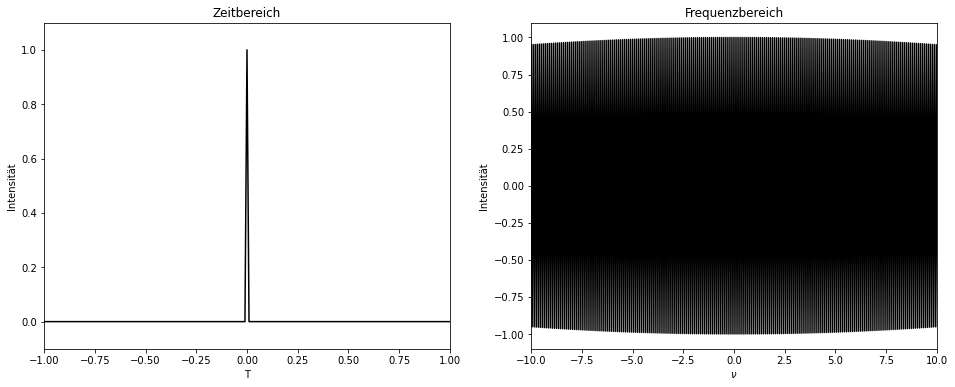

In [3]:
from numpy import fft
import matplotlib.pyplot as plt

n = 2001

# Zeitachse und Signal
t        = np.linspace(-10,10,n)
t,signal = Dirac_delta(t)

# Frequenzachse und Spektrum
dt  = t[1]-t[0]
frq = fft.fftfreq(n,d=dt)
frq = fft.fftshift(frq)
spc = fft.fft(signal)
spc = fft.fftshift(spc)

# Plot

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(t,signal,'k')
plt.xlim((-1,1))
plt.ylim((-0.1,1.1))
plt.xlabel('T')
plt.ylabel('Intensität')
plt.title('Zeitbereich');

plt.subplot(122)
plt.plot(frq,np.real(spc),'k')
plt.xlim((-10,10))
plt.xlabel('$\\nu$')
plt.ylabel('Intensität')
plt.title('Frequenzbereich');


## Aufgabe 2: Null- und Polstellen-Diagramm
---------

Elektrische sowie auch digitale Systeme, wie zum Beispiel Filter, können durch die Null- und Polstellen ihrer Übertragungfunktion G(s) charakterisiert werden. Bei der Übertragungsfunktion (engl. transfer function) handelt es sich um die Laplace Transformation der Impulseantwort g(t).

Gegeben ist die Übertragungsfunktion

$$ G(s)= \frac{P(s)}{Q(s)}= \frac{s+\alpha}{(s+\alpha)^2 +\omega_r^2}$$

für die gilt: 
$$ \omega_r,~\alpha \in \mathbb{R}\qquad\omega_r>\alpha>0 $$

---------

### 2a)
Berechnen Sie die Null- und Polstellen dieser Übertragungsfunktion und plotten Sie diese in der komplexen Zahlenebene (s-Ebene). Verwenden sie die Werte $\omega_r=0.3$ und $\alpha=0.15$.

- Die Nullstellen werden aus dem Zähler des Bruches ermittelt:
$$s + \alpha  = 0$$
$$ z_0 = -\alpha $$

- Die Polstellen werden aus dem Nenner des Bruches ermittelt:
$$ (s+\alpha)^2 + \omega_r^2 = 0 $$
$$ (s+\alpha)^2 = -\omega_r^2 $$
$$ s+\alpha = \pm i \omega_r $$
$$ z_\infty  = \pm i \omega_r -\alpha$$

Text(0.5, 0, '$Re\\{s\\}$')

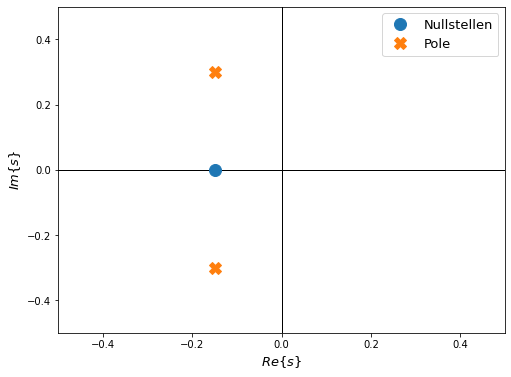

In [4]:
# Parameter
alpha = 0.15
omega = 0.3

# Null- und Polstellen
zeros = -alpha
poles = [1j*omega-alpha, -1j*omega-alpha]

# Plot
plt.figure(figsize=(8,6))
plt.plot([-10, 10],[0, 0],'k', linewidth=1, label='_hidden')
plt.plot([0, 0], [-10, 10], 'k', linewidth=1, label="_hidden")

plt.plot(np.real(zeros),np.imag(zeros),'o',markersize=12,label='Nullstellen')
plt.plot(np.real(poles),np.imag(poles),'X',markersize=12,label='Pole')

plt.xlim((-0.5,0.5))
plt.ylim((-0.5,0.5))
plt.legend(fontsize=13)
plt.ylabel('$Im\{s\}$',fontsize=13)
plt.xlabel('$Re\{s\}$',fontsize=13);


### 2b)
Aus dem Abstand der Nullstellen und Pole zu einer Frequenz in der imaginären Achse kann man die Frequenzeigenschaften des Systems abschätzen.
Um diese Frequenzübertragungseigenschaften des Systems mit Übertragungsfunktion G(s) herauszufinden, verwenden wir ein hilfreiches [Online-Tool](http://controlsystemsacademy.com/0019/0019.html).
Auf dieser Homepage können Sie die errechneten Nullstellen und Pole in der s-Ebene eintragen und es wir automatisch ein Bode Plot generiert. Mehr über Bode Plots finden Sie im Vorlesungsskript auf Seite 54ff.
Bestimmen Sie anhand des Bode Plots die Eigenschaften des hier analysierten Filtersystems.

![Low pass](Low_pass_2b.png)

<u>Lösung:</u>

Es handelt sich bei diesem Filter um einen Low-Pass Filter (LPF) zweiter Ordnung.

### 2c)
Vergleichen Sie die verschiedenen Arten von Filtern auf der [Website](http://controlsystemsacademy.com/0019/0019.html) anhand ihrer Null- und Polstellen. Wie ist die Ordnung der von Filtern definiert?


<u>Lösung:</u>

Die Filterordnung ist definiert als die maximale Anzahl der Null- oder Polstellen. Ein Beispiel: ein Filter mit 2 Nullstelle und 3 Polstellen ist ein Filter dritter Ordnung.

### 2d)
Schieben Sie die Null- und Polstellen von einem High-Pass Filter erster/zweiter Ordnung und dokumentieren Sie ihre Erkenntnisse.
Zum Beispiel:
- Je näher die Nullstelle bei $\omega_0$ (auf imaginären Achse = $i \omega$-Achse) desto ...
- Je näher die Polstelle bei $\omega_0$ (auf imaginären Achse = $i \omega$-Achse) desto ...

<u>Lösung:</u>

- Je näher die Nullstelle bei $\omega_0$ (auf imaginären Achse = $i \omega$-Achse) desto stärker wird die Frequenz $\omega_0$ unterdrückt.
- Je näher die Polstelle bei $\omega_0$ (auf imaginären Achse = $i \omega$-Achse) desto mehr wird die Frequenz $\omega_0$ verstärkt.